# Exploring ARC package for Rydberg calculations

Using example in ARC Prime notebook, I want to apply examples 5 to Hydrogen. The goal is to get parameters that we can input to models for our goal to know more about the physical conditions of the physical media

In [1]:
from arc import *

In [3]:
# Having problems with the c++ library for Numerov integration for n> 8, depending on the function used
# cpp Numerov ON
atom = Hydrogen()

In [12]:
# cpp Numerov OFF
atom = Hydrogen(cpp_numerov=False)

Plotting the Quantum Defects for Hydrogen - All zero
Not useful? Not sure what it is used for?

Text(0.5,1,'H Quantum Defects')

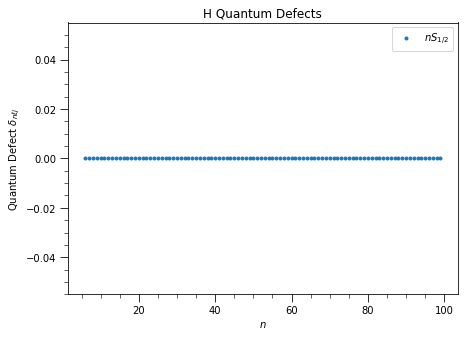

In [4]:
n=np.arange(6,100,1)
    
#Plot Quantum Defects of H
fig, axes = plt.subplots(1, 1, figsize=(7,5))

axes.plot(n,atom.getQuantumDefect(n,0,0.5),'.',label="$nS_{1/2}$")
#axes.plot(n,atom.getQuantumDefect(n,1,1.5),'.',label="$nP_{3/2}$")
#axes.plot(n,atom.getQuantumDefect(n,2,2.5),'.',label="$nD_{5/2}$")
#axes.plot(n,atom.getQuantumDefect(n,3,3.5),'.',label="$nF_{7/2}$")
axes.legend(loc=0)
axes.set_xlabel('$n$')
axes.set_ylabel('Quantum Defect $\delta_{n\ell j}$')
axes.set_title('H Quantum Defects')

Radial Wave function for Hydrogen: calculating the size of a Rydberg atom, average size $\langle r \rangle\propto n^2ea_0$ 

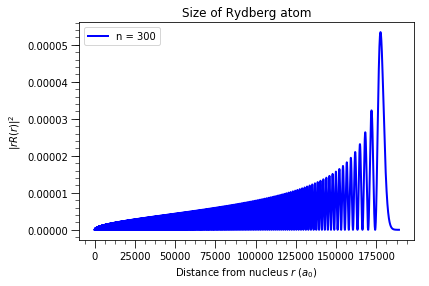

In [8]:
# pqn = [15,30,60] # principal quantum numbers of the states
pqn = [300] # principal quantum numbers of the states
#colors = ["b","r","g"]
colors = ["b"]
l = 0          # S state
j = 0.5        # J = 1/2

plotLegend = []
for i in range(len(pqn)):
    n = pqn[i]
    step = 0.001    
    a1,b1 = atom.radialWavefunction(l,0.5,j,\
                                       atom.getEnergy(n, l, j)/27.211,\
                                       atom.alphaC**(1/3.0),\
                                       2.0*n*(n+15.0), step)
    legendInfo, = plt.plot(a1,(b1)*(b1),\
                           "-",lw=2,color = colors[i], label = ("n = %d" % n) )
    plotLegend.append(legendInfo)
    
plt.legend(handles=plotLegend)
plt.xlabel(r"Distance from nucleus $r$ ($a_0$)")
plt.ylabel(r"$\vert rR(r)\vert^2$")
plt.gca().set_title("Size of Rydberg atom")
plt.show()

# Rydberg atoms lifetimes


In [ ]:
print("\tState Lifetime:\t%.2e ns\n"  
  % (atom.getStateLifetime(n1, l1, j1)*1e9) )

In [10]:
# Definition of the Departure state / Initial
ni = 30
li = 0
ji = 0.5
print("Initial transition: %s " % printStateString(ni,li,ji) )

pqn = []
y = []
ybb = []
    
for n in xrange(5,40):
    pqn.append(n)
    noBBR = atom.getTransitionRate(ni, li, ji, n, 1, 0.5, temperature=0.1)\
            +atom.getTransitionRate(ni, li, ji, n, 1, 1.5, temperature=0.1)
    withBBR =  atom.getTransitionRate(ni, li, ji, n, 1, 0.5, temperature=300.0)\
            +atom.getTransitionRate(ni, li, ji, n, 1, 1.5, temperature=300.0)
    y.append(noBBR)
    ybb.append(withBBR-noBBR)
    
pqn=np.array(pqn) 
y = np.array(y)
ybb = np.array(ybb)

width = 0.4
plt.bar(pqn-width/2.,y,width=width,color="r")
plt.bar(pqn+width/2.,ybb,width=width,color="g")
plt.xlabel("Principal quantum number, $n$")
plt.ylabel(r"Transition rate (s${}^{-1}$)")
plt.title("Transition from 30 $S_{1/2}$ to $n$ $P_{1/2,3/2}$")
plt.legend(("Spontaneous decays","Black-body induced transitions"),fontsize=10)
plt.xlim(4,40)
plt.show()

display(HTML("Lifetime (0 K) &tau;<sub>0</sub> = %.2f &mu;s" % \
             (atom.getStateLifetime(ni,li,ji) *1.e6)))
display(HTML("Lifetime (300 K) &tau;<sub>eff</sub> = %.2f &mu;s" % \
             (atom.getStateLifetime(ni,li,ji,temperature=300.,includeLevelsUpTo=39) *1.e6)))

Initial transition: 30 S 1/2 


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

## Debugging errors with H and StateLifetime



In [14]:
ni = 10
li = 0
ji = 0.5
print("Initial transition: %s " % printStateString(ni,li,ji) )
print("\tState Lifetime:\t%.2e ns\n"  
  % (atom.getStateLifetime(ni, li, ji)*1e9) )

Initial transition: 10 S 1/2 


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'